# Tutorial 5: Decision Trees

**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Name Surname, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# Tutorial Objectives

*Estimated timing of tutorial: 10 minutes* [todo]

Welcome to tutorial 5 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial, we will learn about additional methods that can be applied to the Dengue Fever dataset. By the end of this tutorial, you will be able to:

- Implement Random Forest Regression

- Discuss and analyze its performance.

- Measure feature importance


---

In [1]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---


# Setup






In [2]:
#@title Import necessary libraries:

import numpy as np # Import the numpy library as np
import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library
import pandas as pd # Import the pandas library and the drive function from the google.colab module
from google.colab import drive # Importing the drive module from the google.colab library
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error 

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
NOTE: Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a `"ModuleNotFoundError: No module named 'google.colab'" `error while using 'Colab', please run `"pip install google"` to install the required module.

---

# Section 1: Decision Tree
For any given machine learning problem, there are usually multiple possible models that could be used to solve it. Here we will train a Random Forest Model to predict dengue fever case counts. Random forest regressors are powerful and flexible models for capturing complex and even nonlinear relationships in data.

In [3]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

We have learned about loading, exploring, and preprocessing datasets in the previous tutorial. Now, our focus will be on the subsequent steps.



---


## Section 1.1:  Loading the dataset

---



In [4]:
#@markdown This cell downloads the Dengue Fever dataset that we will use in this tutorial.
#@markdown In this code, we are loading two CSV files from the mounted Google Drive into separate Pandas dataframes. The first dataframe df_features will hold the features data for our model, while the second dataframe df_labels will hold the corresponding labels. By giving them proper names, we can easily differentiate between the two dataframes and understand their purpose.
# Mount the Google Drive to the Colab notebook
drive.mount('/content/drive')

# Load two csv files from the mounted Google Drive into separate Pandas dataframes
# `df_features` will hold the features data for our model
# `df_labels` will hold the corresponding labels
df_features = pd.read_csv('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/dengue_features_train(1).csv')
df_labels = pd.read_csv('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/dengue_labels_train.csv')


Mounted at /content/drive




---


## Section 1.2:  Explore the dataset

---



In [5]:
#@markdown In this code, we are working with the df_features dataframe. The df_features.head() function call will display the first 5 rows of the dataframe, which is helpful for quickly inspecting the data and getting a sense of its structure.

# Display the first 5 rows of the df_features dataframe
df_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


---
## Section 1.3:  Data Preprocessing

---



In [6]:
#@title Data Cleaning
#@markdown We will first load and clean our data as we did before. Specifically, we will drop certain columns, replace missing values, and divide into training and test sets. 
# Drop non-numeric columns and replace missing values
df_cleaned = df_features.drop(['city', 'year', 'week_start_date'], axis=1)
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Extract the target variable (total_cases)
cases = df_labels['total_cases']

# Split the data into training and testing sets using a random mask
np.random.seed(145) #setting the random seed ensures we are all using the same train/test split
mask = np.random.rand(len(cases)) < 0.8   # use 80% of the data for training

df_cleaned_train = df_cleaned[mask]
df_cleaned_test = df_cleaned[~mask]

cases_train = cases[mask]
cases_test = cases[~mask]



---


## Section 1.2 Fitting Model and Analyzing Results 

---



Next, you will train a random forest regression model using scikit-learn's RandomForestRegressor class, with default hyperparameters. Use the documentation of the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to help you if needed. Evaluate the model's performance on the training and test data and make a scatter plot of predicted vs actual cases for the test data.

In [7]:
#################################################
## TODO for students: 
# Fill in the code in empty places to remove this error
raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# to_remove solution

# Train a random forest regression model

rf =  ...      # hint : use the RandomForestRegressor we imported earlier
rf.fit(..., ....)

# Evaluate the model's performance on the training and testing data
print('Accuracy on training data is: ')
print()

print('Accuracy on test data is: ')
print(...)

# Plot the predicted vs. actual total cases on the test data
plt.scatter(cases_test, rf.predict(df_cleaned_test))
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Random Forest Regression')
plt.show()

SyntaxError: ignored

Accuracy on training data is: 
0.9030282060784481
Accuracy on test data is: 
0.46909040881762887


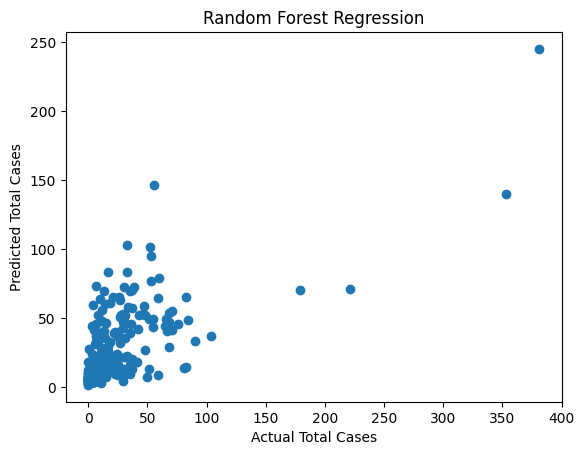

In [8]:
# to_remove solution

# Train a random forest regression model
# use the RandomForestRegressor we imported earlier

rf = RandomForestRegressor()
rf.fit(df_cleaned_train, cases_train)

# Evaluate the model's performance on the training and testing data
print('Accuracy on training data is: ')
print(rf.score(df_cleaned_train, cases_train))

print('Accuracy on test data is: ')
print(rf.score(df_cleaned_test, cases_test))

# Plot the predicted vs. actual total cases on the test data
plt.scatter(cases_test, rf.predict(df_cleaned_test))
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Random Forest Regression')
plt.show()

In [9]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = rf.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('MSE:', mean_squared_error(cases_test, y_pred))

MAE: 16.22773465703971
MSE: 797.2972305388087


### Think! 1.1: Reflecting on the performance 
Please think and discuss the following questions with your pod members:

- How does the performance of the random forest model compare to that of the linear regression model?
- How does the performance on the test data compare to the performance on the training data?
- What could be the reason behind performing well on the training data but poorly on the test data? Hint: Look up 'overfitting'



```
#  to_remove explanation

* The random forest model generally performs better than the linear regression model as it can capture non-linear relationships between features and target.
* The low performance of the model on the test set might be due to the model learning the noise in the training data instead of the underlying patterns.
* Overfitting is the term for good training performance but poor test performance,where the model fits the training data too closely and fails to generalize to new data.
* Solutions to handle overfitting include reducing model complexity, increasing dataset size, using regularization, or cross-validation. Ensemble models such as random forests also do inherently help control overfitting by averaging many different models
```



---
## Section 2 :  Looking at Feature Importance
---


When we train a model to predict an outcome, we can also use 'feature importance' methods to figure out which inputs to the model are most important in driving that prediction. Here we will apply a permutation importance method to our random forest model.

For a given feature in the model, the permutation method randomly shuffles the values of that feature and tests the performance of the network with these permuted values. The amount that the model performance decreases when the feature's values are permuted can provide an indication of how important it is. Sci-kit learn has a method that implements permutation importance. It outputs a normalized measure of how much the feature impacts performance. 

In [15]:
#@markdown *Execute this cell to enable the plotting function to be used for plotting performance of our model in next cell: `plot_feature_importance`*

def plot_feature_importance(perm_feat_imp):
    # Increase the size of the plot for better readability
    plt.figure(figsize=(12, 8))

    # Plot the feature importance with error bars in navy blue color
    plt.errorbar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], perm_feat_imp['importances_std'], fmt='o', capsize=5, markersize=5, color='navy')

    # Add a horizontal line at y=0 for better visualization of feature importances
    plt.axhline(y=0, color='gray', linestyle='--')

    # Set the x-axis and y-axis labels and title
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importance', fontsize=14)
    plt.title('Feature Importance Plot', fontsize=16)

    # Rotate the x-axis labels for better readability
    plt.xticks(np.arange(len(df_cleaned.columns)), df_cleaned.columns, rotation=45, ha='right', fontsize=12)

    # Add gridlines for better visualization
    plt.grid(True, axis='y', linestyle='--')

    # Add a color map for better visualization
    # The color of each bar represents the relative feature importance value
    colors = cm.Blues_r(perm_feat_imp['importances_mean'] / perm_feat_imp['importances_mean'].max())
    plt.bar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], color=colors)

    # Display the plot
    plt.show()


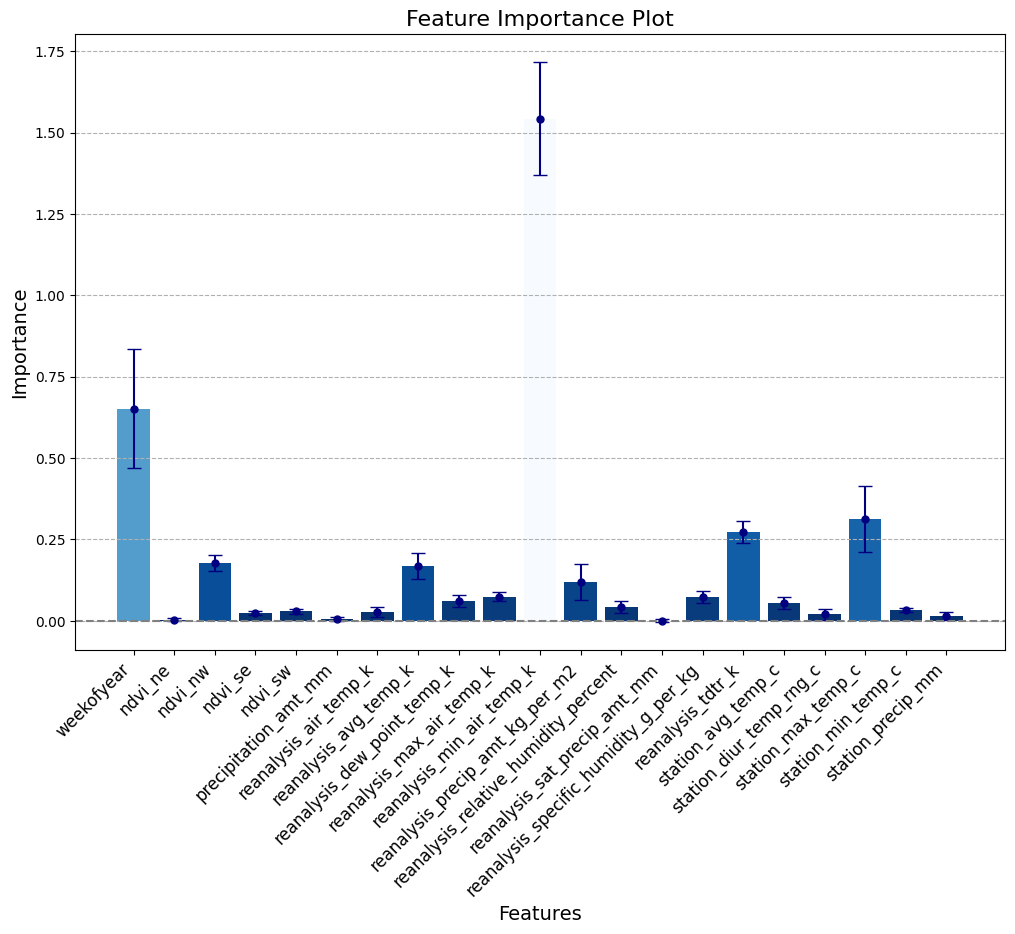

In [16]:
# Plot the feature importance of each input to the model 

# Import the permutation_importance function from the sklearn.inspection module
from sklearn.inspection import permutation_importance

# Use permutation_importance to calculate the feature importances of the trained random forest model
# df_cleaned_test contains the preprocessed test dataset, cases_test contains the actual number of dengue fever cases in the test dataset
# n_repeats specifies how many times the feature importances are calculated for each feature
# random_state is used to seed the random number generator for reproducibility
perm_feat_imp = permutation_importance(rf, df_cleaned_test, cases_test,
                           n_repeats=10,
                           random_state=0)

# Create a plot of the feature importances
plot_feature_importance(perm_feat_imp)


<details>
<summary> <font color='yellow'>Click here description of plot  </font></summary>
The plot shows the feature importance values of each input feature to the random forest model. The x-axis represents the different features, and the y-axis represents their corresponding importance values. The error bars around each bar indicate the variability in the importance values calculated by repeated permutation.

The blue color of each bar represents the relative feature importance value, with darker blue indicating higher importance. The horizontal line at y=0 represents the baseline importance value, and indicates which features are more important than the others.

### Think! 2.1: Reflecting on importance
Please think and discuss the following questions with your pod members:

- Which features were most important?
- Why do you think these features are important?
- Do you think understanding the importance of the different features could help you make a better model?


---
# (Bonus) Section 3: Comparing Feature Importance Methods

The Random Forest Regression model also has a built-in estimation of feature importance. This estimation comes directly from how the decision trees are trained; specifically, it is a measure of how useful the feature is at splitting the data averaged across all nodes and trees. We can access these values directly from the trained model.

Different methods of estimating feature importance can come to different conclusions and may have different biases. Therefore it is good to compare estimations across methods. 

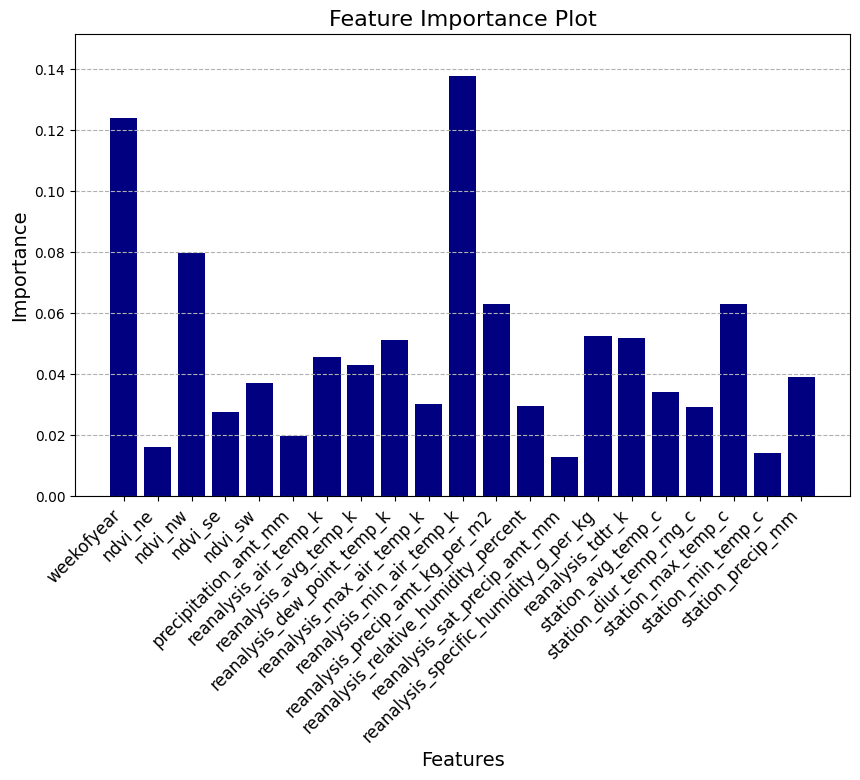

In [18]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart of the feature importances returned by the random forest model
plt.bar(np.arange(len(rf.feature_importances_)), rf.feature_importances_, color='navy')

# Set the x-axis and y-axis labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Plot', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(np.arange(len(df_cleaned.columns)), df_cleaned.columns, rotation=45, ha='right', fontsize=12)

# Set the y-axis limit to better visualize the differences in feature importance
plt.ylim(0, rf.feature_importances_.max() * 1.1)

# Add gridlines for better visualization
plt.grid(True, axis='y', linestyle='--')

# Display the plot
plt.show()


<details>
<summary> <font color='yellow'>Click here for description of plot </font></summary>

The bar chart displays the feature importances returned by the random forest model. Each bar represents the relative importance of each feature in predicting the number of dengue fever cases in the preprocessed dataset. The y-axis represents the importance of the features, while the x-axis displays the name of the features.



---


# Summary

Estimated timing of tutorial: 

In this tutorial, we learned that there are alternative algorithms that can be utilized to model the data, and their implementation can significantly impact the performance of the model. We applied random forest regression and discovered that it performs better than linear regression, but does have a large gap between training and test performance. We also explored which features of the data were most important for the model's decision. 

---



#Exercises

1. Try experimenting with different hyperparameters for the random forest model, such as n_estimators, max_depth, and min_samples_leaf. How do these hyperparameters affect the performance of the model? 

2. Try using a different machine learning algorithm to predict the number of Dengue fever cases, such as a decision tree or support vector machine. How does the performance of these algorithms compare to the random forest model?

3. Try using a different dataset to predict the number of cases of a different disease or health condition. How does the preprocessing and modeling process differ for this dataset compared to the Dengue fever dataset?

4. Try visualizing the decision tree of the random forest model using the plot_tree function of the sklearn package. What insights can you gain from the visualization of the decision tree?